* Radif Ramadan

* Data Science / JCSDOL-014

* Modul 3 - Day 34

---
---

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Gunakan `Carat`, `Depth`, `Table`, `x`, `y`, `z` sebagai variabel independen

### Gunakan `Price` sebagai variabel dependen

In [33]:
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds.price

Analisa korelasi antara independen dan dependen variabel

In [34]:
correlation = X.apply(lambda col: col.corr(y))
df_corr = pd.DataFrame(correlation.round(3), 
                       columns = ['correlation']).sort_values(by = 'correlation',
                                                              ascending = False)
df_corr

,correlation
carat,0.922
x,0.884
y,0.865
z,0.861
table,0.127
depth,-0.011


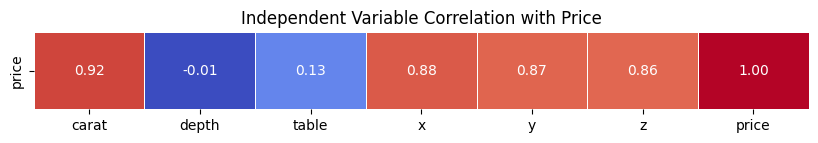

In [36]:
selected_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

correlation_matrix = diamonds[selected_columns].corr()

price_correlation = correlation_matrix[['price']].T

plt.figure(figsize=(10, 1))
sns.heatmap(price_correlation, annot=True, cbar=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Independent Variable Correlation with Price")
plt.show()

### **Interpretasi hasil korelasi**

* `Carat` --> menunjukkan bahwa semakin besar berat berlian (carat), semakin tinggi (mahal) harga berlian tersebut
* `Depth` --> menjukkan hampir tidak memiliki hubungan antara kedalaman (depth) dengan harga berlian
* `Table` --> menunjukkan hubungan yang lemah antara ukuran proporsi bagian atas berlian relatif terhadap lebar berlian (Table) dengan harga berlian
* `Dimensi (X,Y,Z)` --> menunjukkan berlian dengan harga menunjukkan bahwa berlian yang lebih besar dalam ukuran fisiknya (X,Y,Z) cenderung lebih mahal harganya

`Kesimpulan` : **Harga berlian  dipengaruhi oleh beratnya (carat), dengan korelasi sangat tinggi (0.922), diikuti oleh dimensi fisik (x, y, z)**. Dan faktor lainnya seperti proporsi table memiliki pengaruh kecil, sementara depth hampir tidak berpengaruh. Ini menegaskan bahwa dalam menentukan harga berlian, ukuran dan berat jauh lebih signifikan dibandingkan aspek proporsional lainnya.



### **Lakukan Multiple Linear Regression**

**Keluarkan hasi regresi tersebut (baik dari Intercept maupun Slopenya)**

In [42]:
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_

print(f'Intercept: {intercept:.3f}')
print(f'Slope -->')
for col, coef in zip(X.columns, slope):
    print(f'{col}: {coef:.3f}')

Intercept: 20849.316
Slope -->
carat: 10686.309
depth: -203.154
table: -102.446
x: -1315.668
y: 66.322
z: 41.628


### **Interpretasikan hasilnya**

* **Harga berlian terutama dipengaruhi oleh beratnya (carat), dengan setiap kenaikan 1 unit meningkatkan harga sekitar $10,686**, jauh lebih signifikan dibandingkan faktor lain. Proporsi depth dan table justru menurunkan harga, sementara dimensi fisik (x, y, z) menunjukkan efek bervariasi, kemungkinan akibat *multicollinearity*. Model ini menegaskan bahwa carat berlian adalah penentu utama harga, sementara faktor proporsi dan dimensi perlu dianalisis lebih lanjut untuk hasil yang lebih baik.

IndexError: index 2 is out of bounds for axis 0 with size 2

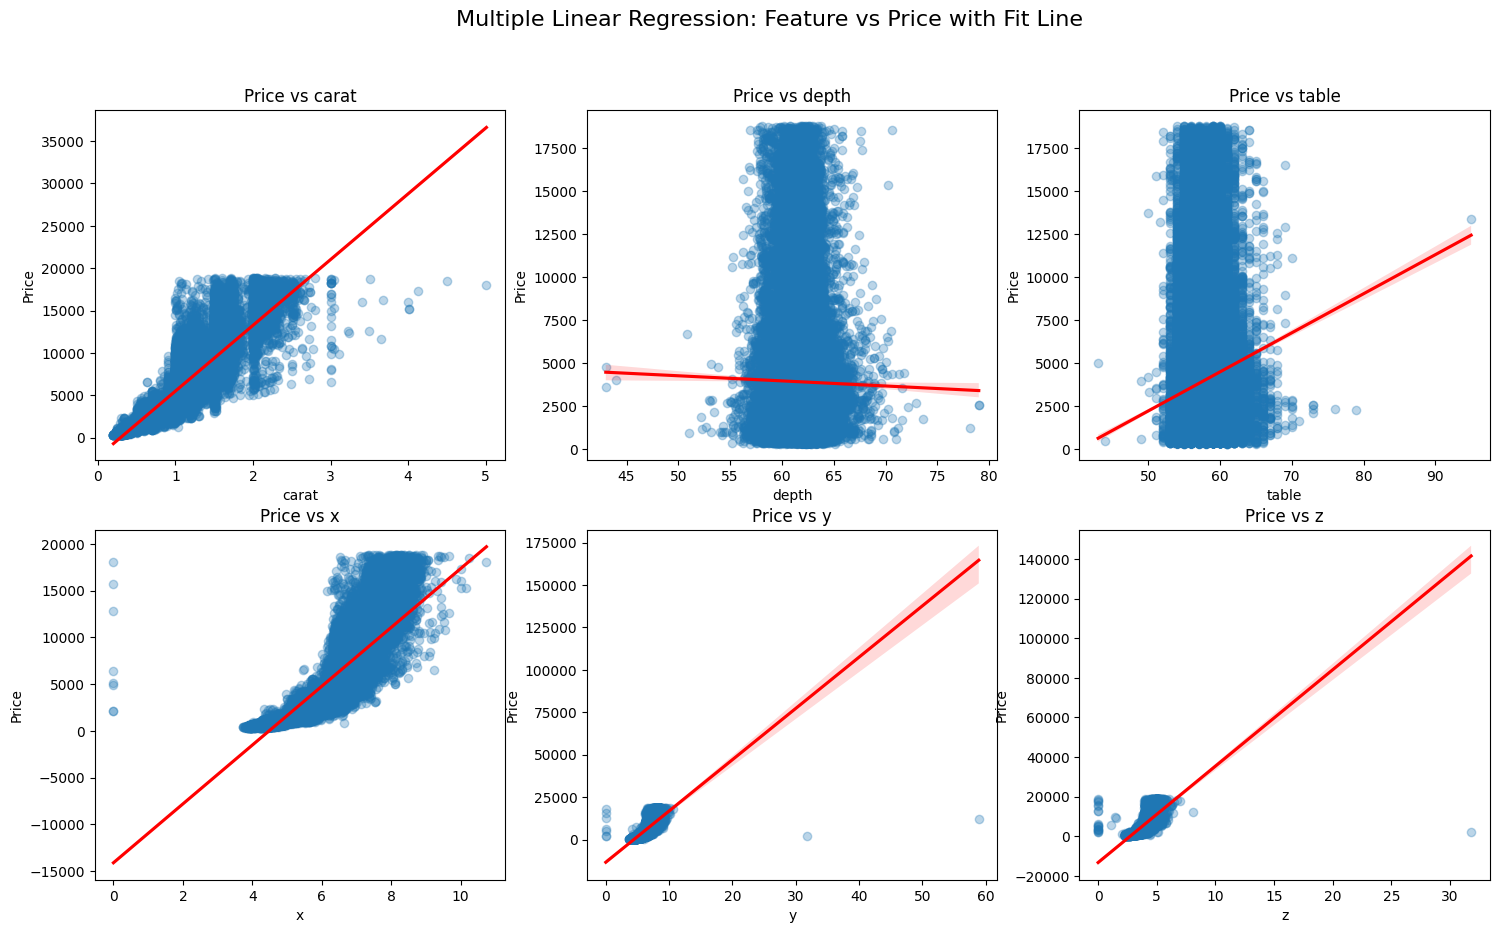

In [44]:
# Create plots with regression lines
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Multiple Linear Regression: Feature vs Price with Fit Line', fontsize=16)

for idx, col in enumerate(selected_columns):
    row, col_idx = divmod(idx, 3)
    sns.regplot(x=diamonds[col], y=y, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'}, ax=axes[row, col_idx])
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Price')
    axes[row, col_idx].set_title(f'Price vs {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### **Lakukan evaluasi terhadap hasil linreg tersebut**

In [47]:
y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')
print(f'R^2 Score: {r2:.2f}')

Mean Absolute Error (MAE): 889.34
Mean Squared Error (MSE): 2240581.73
Root Mean Squared Error (RMSE): 1496.86
Mean Absolute Percentage Error (MAPE): 27.91%
R^2 Score: 0.86


### **Buat analisa error**

* `Mean Absolute Error (MAE)` --> menunjukkan bahwa rata-rata kesalahan prediksi meleset dengan harga aktual berlian adalah **$889.34**
* `Mean Squared Error (MSE)` --> menunjukkan bahwa rata-rata kesalahan prediksi meleset **-$2,240,581.73**. Nilai tinggi ini mengindikasikan adanya beberapa prediksi yang jauh meleset.
* `Root Mean Squared Error (RMSE)` --> menunjukkan rata-rata prediksi model meleset sekitar **$1,496.86** dalam satuan yang sama dengan harga berlian
* `Mean Absolute Percentage Error (MAPE)` --> menunjukkan rata-rata prediksi memiliki kesalahan sebesar **27.91%** dari harga sebenarnya
* `R^2 Score` --> menunjukkan bahwa **86% (0.86)** variansi harga berlian dapat dijelaskan oleh model

`Kesimpulan:` **Model regresi ini cukup baik dengan akurasi tinggi (R² = 86%)**, namun masih memiliki kesalahan prediksi rata-rata pada berlian dengan kisaran harga $889 - $1,497. Kesalahan prediksi terbesar muncul pada harga berlian yang lebih tinggi atau rendah 27.91% dari harga sebenarnya, yang tercermin juga dari MSW sebesar -$2,240,581.73

IndexError: index 2 is out of bounds for axis 0 with size 2

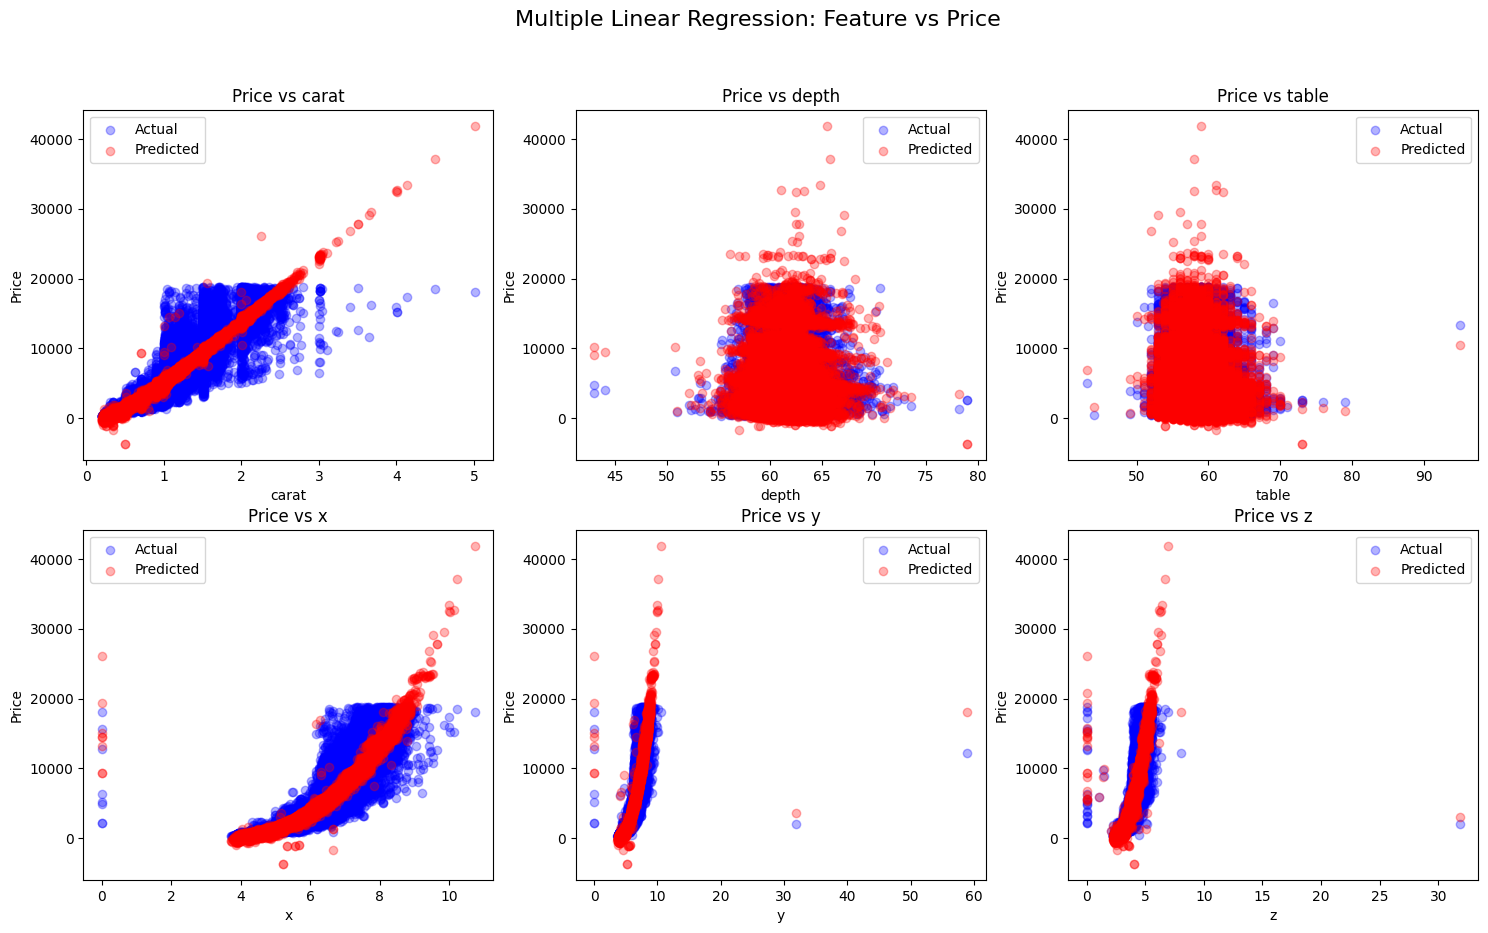

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Multiple Linear Regression: Feature vs Price', fontsize=16)

for idx, col in enumerate(selected_columns):
    row, col_idx = divmod(idx, 3)
    axes[row, col_idx].scatter(diamonds[col], y, alpha=0.3, label='Actual', color='blue')
    axes[row, col_idx].scatter(diamonds[col], y_pred, alpha=0.3, label='Predicted', color='red')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Price')
    axes[row, col_idx].legend()
    axes[row, col_idx].set_title(f'Price vs {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
